<a href="https://colab.research.google.com/github/gibril1435/Data-Mining/blob/main/Estimasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub

# Download Dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ruchikakumbhar/obesity-prediction")

print("Path to dataset files:", path)

100%|██████████| 57.5k/57.5k [00:00<00:00, 42.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ruchikakumbhar/obesity-prediction/versions/1


# Import Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load Dataset

In [ ]:
import os
csv_file = None

if 'path' in locals():
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".csv"):
                csv_file = os.path.join(root, file)
                break
    if csv_file:
        print(f"Menemukan file CSV: {csv_file}")
        df = pd.read_csv(csv_file)
        # Strip whitespace from column names
        df.columns = df.columns.str.strip()
        print("Dataset berhasil dimuat!")
        display(df.head())
    else:
        print("Error: Tidak ditemukan file CSV di dalam folder tersebut.")
else:
    print("Error: Variabel 'path' tidak ditemukan. Pastikan Anda sudah menjalankan perintah kagglehub di cell sebelumnya.")

Menemukan file CSV: /root/.cache/kagglehub/datasets/ruchikakumbhar/obesity-prediction/versions/1/Obesity prediction.csv
Dataset berhasil dimuat!


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Encoding Data

In [ ]:
# Membuat kamus untuk menyimpan encoder agar bisa di-decode nanti
encoders = {}

# Daftar kolom yang isinya teks/kategori
categorical_cols = ['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'Obesity']

# Loop untuk mengubah setiap kolom teks menjadi angka
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le # Simpan encoder

print("Encoding selesai. Data sekarang berbentuk numerik.")
display(df.head())

Encoding selesai. Data sekarang berbentuk numerik.


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,0,404,295,245,1,0,170,477,2,0,549,0,0,840,3,3,1
1,0,404,28,173,1,0,809,477,2,1,1267,1,1189,0,2,3,1
2,1,701,1306,382,1,0,170,477,2,0,549,0,1071,840,1,3,1
3,1,1021,1306,643,0,0,809,477,2,0,549,0,1071,0,1,4,5
4,1,578,1202,692,0,0,170,0,2,0,549,0,0,0,2,3,6


# Standarisasi dan Spilitting Data

In [ ]:
# Memisahkan Fitur (X) dan Target (y)
target_col = 'Obesity'
X = df.drop(columns=[target_col])
y = df[target_col]

# Standarisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi Data Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Data siap")
print(f"Jumlah Data Latih (Training): {X_train.shape[0]} baris")
print(f"Jumlah Data Uji (Testing)  : {X_test.shape[0]} baris")

Data siap
Jumlah Data Latih (Training): 1688 baris
Jumlah Data Uji (Testing)  : 423 baris


# Elbow Method

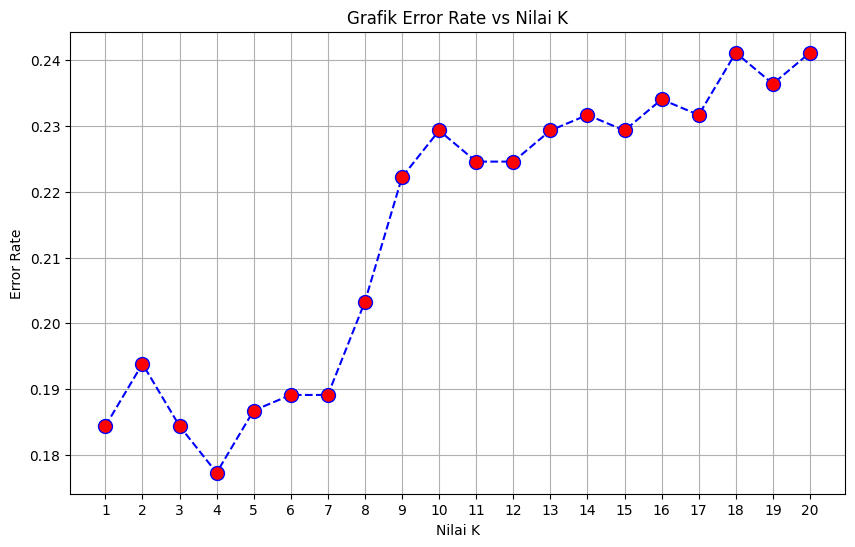

Rekomendasi Nilai K Terbaik: 4


In [ ]:
error_rate = []
range_k = range(1, 21)

# Loop mencoba K dari 1 sampai 20
for i in range_k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # Menghitung rata-rata kesalahan
    error_rate.append(np.mean(pred_i != y_test))

# Visualisasi Grafik Elbow
plt.figure(figsize=(10, 6))
plt.plot(range_k, error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Grafik Error Rate vs Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Error Rate')
plt.xticks(range_k)
plt.grid(True)
plt.show()

# Mengambil nilai K dengan error terkecil
best_k = error_rate.index(min(error_rate)) + 1
print(f"Rekomendasi Nilai K Terbaik: {best_k}")

# Evaluasi Model

In [ ]:
# Latih model final menggunakan K terbaik
classifier = KNeighborsClassifier(n_neighbors=best_k)
classifier.fit(X_train, y_train)

# Prediksi data testing
y_pred = classifier.predict(X_test)

# Tampilkan metrik evaluasi
print("\n=== Laporan Evaluasi Model ===")
print(f"Akurasi: {accuracy_score(y_test, y_pred):.2%}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


=== Laporan Evaluasi Model ===
Akurasi: 82.27%

Confusion Matrix:
[[52  2  0  0  0  2  0]
 [19 27  6  0  0  3  7]
 [ 0  0 72  2  0  2  2]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 4  6  2  0  0 40  4]
 [ 1  1  5  0  1  4 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.93      0.79        56
           1       0.75      0.44      0.55        62
           2       0.83      0.92      0.87        78
           3       0.97      0.97      0.97        58
           4       0.98      1.00      0.99        63
           5       0.78      0.71      0.75        56
           6       0.75      0.76      0.75        50

    accuracy                           0.82       423
   macro avg       0.82      0.82      0.81       423
weighted avg       0.82      0.82      0.81       423



# Uji Coba Data Baru Acak

In [ ]:
# Ambil 1 contoh data secara acak dari data test
idx = np.random.randint(0, len(X_test))
sample_data = X_test[idx].reshape(1, -1)
true_label_index = y_test.iloc[idx]

# Prediksi
pred_label_index = classifier.predict(sample_data)[0]

# Decode (kembalikan angka ke teks asli)
target_encoder = encoders['Obesity']
pred_class_name = target_encoder.inverse_transform([pred_label_index])[0]
true_class_name = target_encoder.inverse_transform([true_label_index])[0]

print(f"Data Test Index ke-{idx}")
print(f"Label Asli     : {true_class_name}")
print(f"Hasil Prediksi : {pred_class_name}")

if pred_class_name == true_class_name:
    print("Prediksi Benar!")
else:
    print("Prediksi Salah.")

Data Test Index ke-242
Label Asli     : 5
Hasil Prediksi : 5
Prediksi Benar!


# Tabel Perbandingan

In [ ]:
# Mengambil 10 contoh data secara acak dari data test
random_indices = np.random.choice(len(X_test), 10, replace=False)

# list untuk menampung hasil
results = []

# Loop untuk setiap index yang terpilih
for idx in random_indices:
    original_idx = y_test.index[idx]
    row_data = df.loc[original_idx].copy()

    sample_data_scaled = X_test[idx].reshape(1, -1)

    # Prediksi
    pred_label_index = classifier.predict(sample_data_scaled)[0]
    pred_class_name = encoders['Obesity'].inverse_transform([pred_label_index])[0]

    true_label_index = row_data['Obesity']
    true_class_name = encoders['Obesity'].inverse_transform([true_label_index])[0]

    # Decode fitur Gender
    gender_val = encoders['Gender'].inverse_transform([int(row_data['Gender'])])[0]
    # Decode fitur family_history
    fam_hist_val = encoders['family_history'].inverse_transform([int(row_data['family_history'])])[0]

    results.append({
        'Gender': gender_val,
        'Age': int(row_data['Age']),
        'Height': round(row_data['Height'], 2),
        'Weight': round(row_data['Weight'], 1),
        'Family_History': fam_hist_val,
        'Actual_Obesity': true_class_name,
        'Predicted_Obesity': pred_class_name
    })

comparison_df = pd.DataFrame(results)
print("Tabel Perbandingan Prediksi vs Aktual (10 Data Acak)")
display(comparison_df)

correct_count = np.sum(comparison_df['Actual_Obesity'] == comparison_df['Predicted_Obesity'])
print(f"\nJumlah Prediksi Benar: {correct_count} dari 10")

Tabel Perbandingan Prediksi vs Aktual (10 Data Acak)


,Gender,Age,Height,Weight,Family_History,Actual_Obesity,Predicted_Obesity
0,1,830,767,572,1,6,6
1,0,701,775,98,1,0,0
2,1,689,724,750,1,2,2
3,0,949,336,930,1,4,4
4,1,75,927,245,0,1,0
5,0,903,350,1019,1,4,4
6,0,186,560,245,0,1,0
7,1,433,668,809,1,2,2
8,1,488,787,351,1,5,5
9,1,212,701,409,1,6,6



Jumlah Prediksi Benar: 8 dari 10
